In [1]:
!pip install tensorflow

In [2]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [3]:
# Importing the dataset
Raisin_Dataset = pd.read_csv('Raisin_Dataset.csv')

In [4]:
# return a tuple containing the number of rows and columns of the DataFrame
Raisin_Dataset.shape

(900, 8)

In [5]:
# return first sets of datasets content
Raisin_Dataset.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


In [6]:
# return last sets of datasets content
Raisin_Dataset.tail()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,Besni
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,Besni
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,Besni
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,Besni
899,85609,512.081774,215.271976,0.907345,89197,0.632020,1272.862,Besni


In [7]:
# perfomed descriptive statistical analysis on the dataset
Raisin_Dataset.describe()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,87804.127778,430.929950,254.488133,0.781542,91186.090000,0.699508,1165.906636
std,39002.111390,116.035121,49.988902,0.090318,40769.290132,0.053468,273.764315
min,25387.000000,225.629541,143.710872,0.348730,26139.000000,0.379856,619.074000
25%,59348.000000,345.442898,219.111126,0.741766,61513.250000,0.670869,966.410750
50%,78902.000000,407.803951,247.848409,0.798846,81651.000000,0.707367,1119.509000
75%,105028.250000,494.187014,279.888575,0.842571,108375.750000,0.734991,1308.389750
max,235047.000000,997.291941,492.275279,0.962124,278217.000000,0.835455,2697.753000


In [8]:
# check for missing values; output shows no missing values
Raisin_Dataset.isnull().sum()

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64

In [9]:
# check for detailed summary information of the dataset
Raisin_Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


In [10]:
#checking if the class is imbalance; output shows a balanced class of dataset
Raisin_Dataset.Class.value_counts()

Kecimen    450
Besni      450
Name: Class, dtype: int64

In [11]:
# Encoding the class data
Raisin_Dataset["Class"] = Raisin_Dataset["Class"].replace(["Kecimen","Besni"],[0,1],regex = True)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

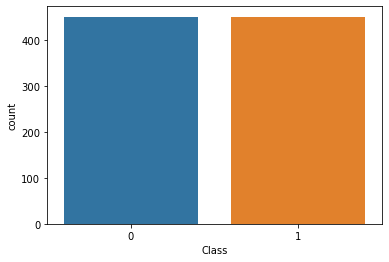

In [12]:
# visualing the class balance
sns.countplot(Raisin_Dataset["Class"])

In [13]:
# Training the Dataset
X = Raisin_Dataset.iloc[:,0:7]
y = Raisin_Dataset.iloc[:,7]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =
0.2, stratify=y, random_state=0)

In [15]:
#identify input shape
print(X_train.shape)

(720, 7)


In [16]:
# Applying feature selection to removes all low-variance features in the dataset; vs means variance selector
from sklearn.feature_selection import VarianceThreshold as VT
vs = VT(threshold=0)
X_train_fs = vs.fit_transform(X_train)
X_test_fs = vs.transform(X_test)
print(f"{X_train.shape[1]-X_train_fs.shape[1]} low-variance features removed, {X_train_fs.shape[1]} features remain")

0 low-variance features removed, 7 features remain


In [17]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
# setting up keras model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(5,activation='relu',input_shape=(7,)))
model.add(tf.keras.layers.Dense(2,activation='softmax'))

In [19]:
#Model compilation
model.compile(optimizer='adam',
 loss='sparse_categorical_crossentropy',
 metrics='accuracy')

In [20]:
# fit the keras model on the dataset 
history = model.fit(X_train, y_train, epochs=50, batch_size=8, verbose=2,validation_split=0.2)

Epoch 1/50
72/72 - 2s - loss: 0.8102 - accuracy: 0.2274 - val_loss: 0.7239 - val_accuracy: 0.3403 - 2s/epoch - 24ms/step
Epoch 2/50
72/72 - 0s - loss: 0.6586 - accuracy: 0.5538 - val_loss: 0.6120 - val_accuracy: 0.7222 - 207ms/epoch - 3ms/step
Epoch 3/50
72/72 - 0s - loss: 0.5671 - accuracy: 0.7934 - val_loss: 0.5254 - val_accuracy: 0.8125 - 211ms/epoch - 3ms/step
Epoch 4/50
72/72 - 0s - loss: 0.4886 - accuracy: 0.8542 - val_loss: 0.4505 - val_accuracy: 0.8542 - 201ms/epoch - 3ms/step
Epoch 5/50
72/72 - 0s - loss: 0.4278 - accuracy: 0.8611 - val_loss: 0.3995 - val_accuracy: 0.8750 - 218ms/epoch - 3ms/step
Epoch 6/50
72/72 - 0s - loss: 0.3903 - accuracy: 0.8663 - val_loss: 0.3701 - val_accuracy: 0.8750 - 215ms/epoch - 3ms/step
Epoch 7/50
72/72 - 0s - loss: 0.3701 - accuracy: 0.8663 - val_loss: 0.3541 - val_accuracy: 0.8819 - 200ms/epoch - 3ms/step
Epoch 8/50
72/72 - 0s - loss: 0.3593 - accuracy: 0.8663 - val_loss: 0.3438 - val_accuracy: 0.8750 - 215ms/epoch - 3ms/step
Epoch 9/50
72/72 -

In [21]:
#view a details of the neural network built.
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 40        
                                                                 
 dense_1 (Dense)             (None, 2)                 12        
                                                                 
Total params: 52
Trainable params: 52
Non-trainable params: 0
_________________________________________________________________


In [22]:
# evaluate the keras model
accuracy = model.evaluate(X_train, y_train)

23/23 [==============================] - 0s 4ms/step - loss: 0.3268 - accuracy: 0.8708


In [23]:
score = model.evaluate(X_test, y_test)
print(score)

6/6 [==============================] - 0s 3ms/step - loss: 0.3623 - accuracy: 0.8667
[0.36232790350914, 0.8666666746139526]


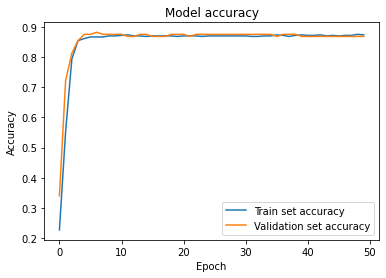

In [24]:
# Plot accuracy model
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train set accuracy', 'Validation set accuracy'], loc='lower right')
plt.show()

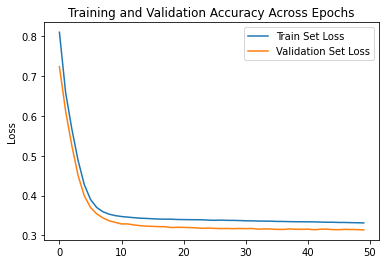

In [25]:
# Plot loss model
loss = history.history['loss']
validation_loss = history.history['val_loss']

plt.plot(loss, label='Train Set Loss')
plt.plot(validation_loss, label='Validation Set Loss')
plt.ylabel('Loss')
plt.title('Training and Validation Accuracy Across Epochs')
plt.legend()

In [26]:
#evalute the model to check the accuracy using confusion matrix
from sklearn.metrics import confusion_matrix, classification_report, multilabel_confusion_matrix

In [27]:
# predict the model
y_predict = model.predict(X_test)
y_predict_s = y_predict.argmax(axis=1)


6/6 [==============================] - 0s 4ms/step


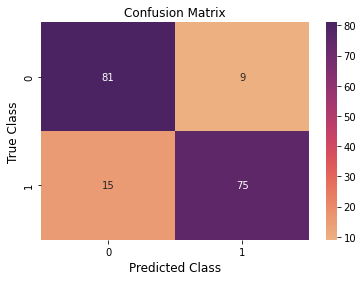

In [28]:
confusion_matrix = confusion_matrix(y_test,y_predict_s)

ax = sns.heatmap(confusion_matrix, cmap='flare',annot=True, fmt='d')

plt.xlabel("Predicted Class",fontsize=12)
plt.ylabel("True Class",fontsize=12)
plt.title("Confusion Matrix",fontsize=12)
plt.show()

In [29]:
# Results shows f1 score as 0.87 and 0.86 and accuracy score of 0.87
print(classification_report(y_test,y_predict_s))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87        90
           1       0.89      0.83      0.86        90

    accuracy                           0.87       180
   macro avg       0.87      0.87      0.87       180
weighted avg       0.87      0.87      0.87       180

